In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.preprocessing import LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
bike = pd.read_pickle('./data/bike.pkl')
bike.head()

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,trip_duration_min,bg,month_April,month_Februrary,month_January,month_March,month_May,user_type_Customer,user_type_Subscriber
4,1128,124.0,5.0,877,1973.0,18.80,Brogrammer,1,0,0,0,0,0,1
5,1388,243.0,247.0,3234,1997.0,23.13,Brogrammer,1,0,0,0,0,1,0
6,920,202.0,220.0,3262,1976.0,15.33,Brogrammer,1,0,0,0,0,0,1
7,725,44.0,121.0,2706,1973.0,12.08,Brogrammer,1,0,0,0,0,1,0
8,488,21.0,64.0,860,1986.0,8.13,Brogrammer,1,0,0,0,0,0,1


In [3]:
bike.bg.value_counts()

Brogrammer     706660
Nice_person    240182
Name: bg, dtype: int64

In [4]:
bike.describe()

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,trip_duration_min,month_April,month_Februrary,month_January,month_March,month_May,user_type_Customer,user_type_Subscriber
count,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000
mean,578.960272,138.468291,135.722913,3891.877124,1984.673319,9.649340,0.226212,0.176227,0.182460,0.241813,0.173288,0.098418,0.901582
std,324.429294,112.670023,111.868923,1972.289709,10.045458,5.407152,0.418378,0.381013,0.386224,0.428182,0.378496,0.297879,0.297879
min,61.000000,3.000000,3.000000,11.000000,1878.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327.000000,47.000000,44.000000,2175.000000,1980.000000,5.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,512.000000,101.000000,98.000000,4560.000000,1987.000000,8.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,769.000000,238.000000,223.000000,5433.000000,1992.000000,12.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1583.000000,427.000000,427.000000,7196.000000,2001.000000,26.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
bike.bg.value_counts()

Brogrammer     706660
Nice_person    240182
Name: bg, dtype: int64

In [7]:
bike.describe()

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,trip_duration_min,month_April,month_Februrary,month_January,month_March,month_May,user_type_Customer,user_type_Subscriber
count,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000,946842.000000
mean,578.960272,138.468291,135.722913,3891.877124,1984.673319,9.649340,0.226212,0.176227,0.182460,0.241813,0.173288,0.098418,0.901582
std,324.429294,112.670023,111.868923,1972.289709,10.045458,5.407152,0.418378,0.381013,0.386224,0.428182,0.378496,0.297879,0.297879
min,61.000000,3.000000,3.000000,11.000000,1878.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327.000000,47.000000,44.000000,2175.000000,1980.000000,5.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,512.000000,101.000000,98.000000,4560.000000,1987.000000,8.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,769.000000,238.000000,223.000000,5433.000000,1992.000000,12.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1583.000000,427.000000,427.000000,7196.000000,2001.000000,26.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


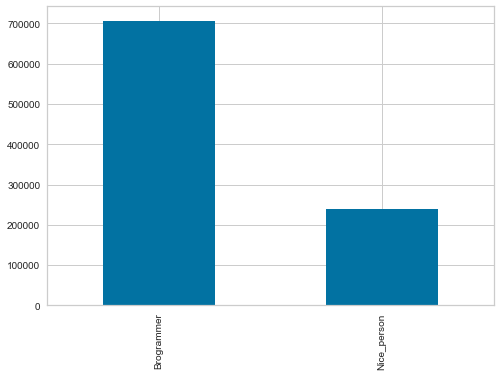

In [8]:
bike.bg.value_counts().plot(kind='bar')

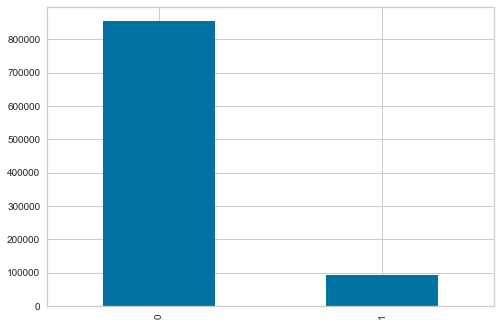

In [9]:
bike.user_type_Customer.value_counts().plot(kind='bar')

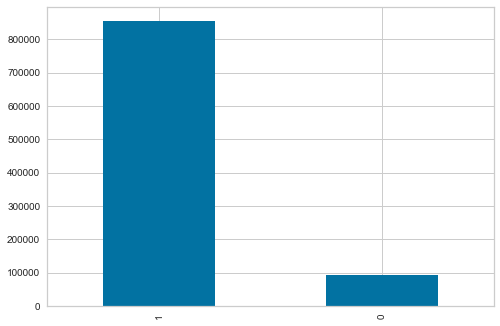

In [11]:
bike.user_type_Subscriber.value_counts().plot(kind='bar')

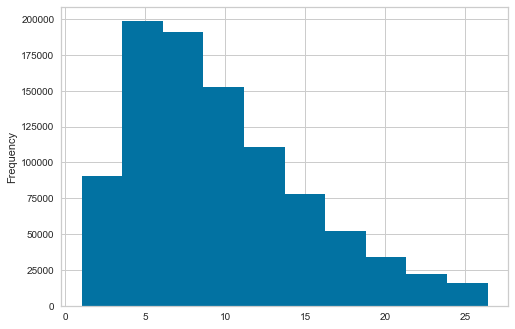

In [13]:
bike.trip_duration_min.plot(kind='hist')

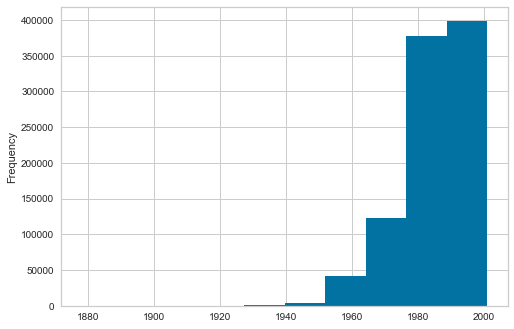

In [14]:
bike.member_birth_year.plot(kind='hist')

In [16]:
import numpy as np
seed = np.random.seed(107)

y= bike['bg']
X = bike.drop(['bg','trip_duration_sec'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=.3, random_state=seed)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(662789, 12)
(662789,)
(284053, 12)
(284053,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
from sklearn.linear_model import LogisticRegression

In [ ]:
new_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='elasticnet', class_weight='balanced'))
new_p_grid = {'logisticregression__'}
